In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
with open("C:/Users/PC/Clarin/rostros/Clarin.json", 'r') as f:
    db1= json.load(f)
    
with open("C:/Users/PC/Clarin/rostros/Lanac.json", 'r') as f:
    db2= json.load(f)

In [3]:
df1 = pd.DataFrame(db1)
df2 = pd.DataFrame(db2)

In [4]:
df1=pd.concat([df1.drop(['emotions'], axis=1), df1['emotions'].apply(pd.Series)], axis=1)
df2=pd.concat([df2.drop(['emotions'], axis=1), df2['emotions'].apply(pd.Series)], axis=1)

In [5]:
frames = [df1, df2]
df = pd.concat(frames)

In [6]:
df["n"]=1

In [8]:
df['year'] = df['archivo'].astype(str).str[0:4]
df['month'] = df['archivo'].astype(str).str[4:6]
df['day'] = df['archivo'].astype(str).str[6:8]
df['fecha'] = pd.to_datetime(df['month']+"/"+df['day']+"/"+df['year'], format='%m/%d/%Y')

In [9]:
yearly=df.resample('Y', on='fecha').sum()

In [10]:
import statistics 

yearly_n=pd.DataFrame()

yearly_n["angry"]=yearly["angry"]/(yearly["n"])
yearly_n["disgust"]=yearly["disgust"]/yearly["n"]
yearly_n["fear"]=yearly["fear"]/yearly["n"]
yearly_n["happy"]=yearly["happy"]/(yearly["n"])
yearly_n["sad"]=yearly["sad"]/yearly["n"]
yearly_n["surprise"]=yearly["surprise"]/yearly["n"]
yearly_n["neutral"]=yearly["neutral"]/yearly["n"]
yearly_n["n"]=yearly["n"]

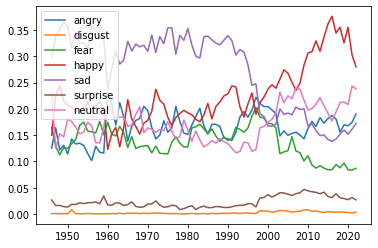

In [11]:
sent = ["angry","disgust","fear","happy","sad","surprise","neutral"]
plt.plot(yearly_n[sent])
plt.legend(yearly_n.columns.tolist())

In [11]:
yearly_n["n"].sum()

78806

In [12]:
#sent=["angry","disgust","fear","happy","sad","surprise","neutral"]
#yearly_n.where(yearly_n >= 0.2, 0, inplace=True)

In [13]:
pca = PCA(n_components=1)
yearly_n["r"]= pca.fit_transform(yearly_n[sent])
yearly_n["I"]=yearly_n["r"]*np.log(yearly_n["n"])

bad=["angry", "disgust", "fear", "sad"]
yearly_n["r_bad"]= pca.fit_transform(yearly_n[bad])
yearly_n["I_bad"]=yearly_n["r_bad"]*np.log(yearly_n["n"])

good=["happy", "surprise", "neutral"]
yearly_n["r_good"]= pca.fit_transform(yearly_n[good])
yearly_n["I_good"]=yearly_n["r_good"]*np.log(yearly_n["n"])

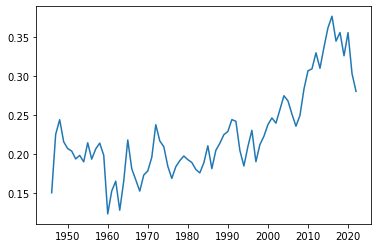

In [14]:
plt.plot(yearly_n["happy"])

# Series Macro

In [34]:
gdp_anual=pd.read_csv("C:/Users/PC/Clarin/pib_anual 2.csv", sep=";")

In [35]:
yearly_n["year"]=np.arange(yearly_n.shape[0])+1945

In [36]:
todo=pd.merge(yearly_n,gdp_anual, on="year")

In [37]:
nlp=pd.read_csv("C:/Users/PC/Clarin/indice nlp.csv", sep=";")
todo=pd.merge(todo,nlp, on="year")
todo["It"]=todo["nlp"]

[Text(581.25, 943.75, 'tristeza <= 0.171\ngini = 0.458\nsamples = 76\nvalue = [49, 27]'),
 Text(290.625, 566.25, 'felicidad <= 0.328\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(145.3125, 188.75, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(435.9375, 188.75, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(871.875, 566.25, 'sorpresa <= 0.013\ngini = 0.398\nsamples = 62\nvalue = [45, 17]'),
 Text(726.5625, 188.75, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(1017.1875, 188.75, 'gini = 0.324\nsamples = 54\nvalue = [43, 11]')]

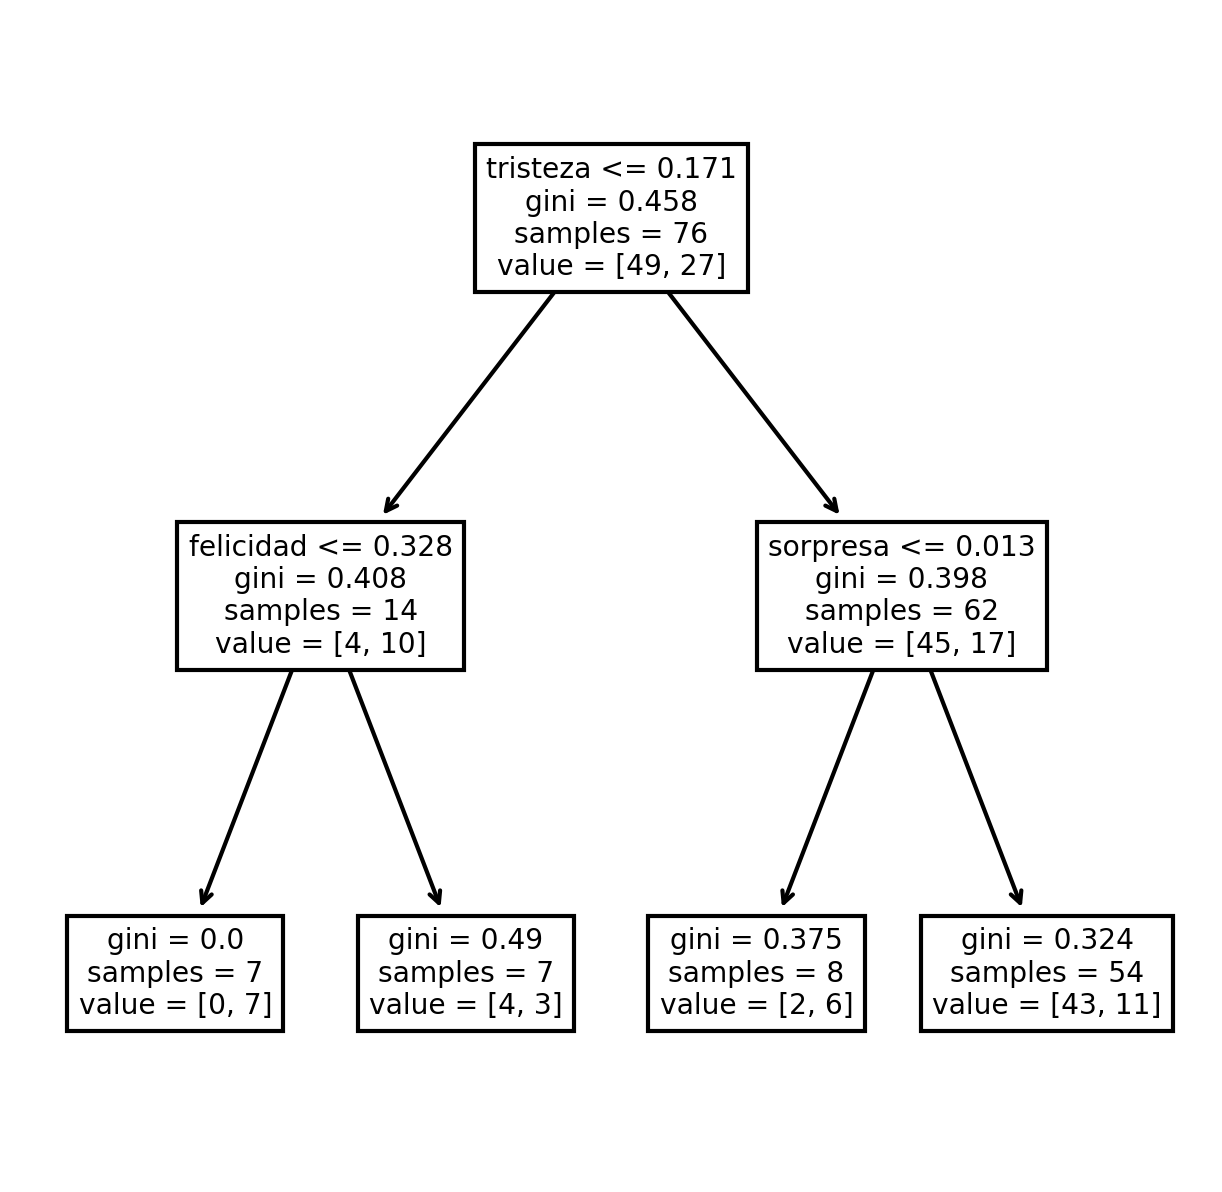

In [38]:
from sklearn import tree
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)

vars=["angry","disgust","fear","happy","sad","surprise","neutral", "It"]
vars2=["enojo","disgusto","miedo","felicidad","tristeza","sorpresa","neutral", "It"]
clf = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(todo[vars] , todo["recession"])
tree.plot_tree(clf, feature_names=vars2) 

In [39]:
print(clf.score(todo[vars] , todo["recession"]))

0.7894736842105263


In [40]:
todo["gdp_serie"]=todo["gdp"]

vars=["angry","disgust","fear","happy","sad","surprise","neutral", "I", "gdp", "gdp_serie"]
for a in vars:
    todo[a+"_t1"]=todo[a].shift()
    #todo[a+"_t2"]=todo[a].shift(2)
    #todo[a+"_t3"]=todo[a].shift(3)
    #todo[a+"_t4"]=todo[a].shift(4)
    #todo[a+"_t5"]=todo[a].shift(5)
    
    #todo[a+"_5"]=todo[a]/(todo[a+"_t1"]+todo[a+"_t2"]+todo[a+"_t3"]+todo[a+"_t4"]+todo[a+"_t5"])/5
    #todo[a+"_3"]=todo[a]/(todo[a+"_t1"]+todo[a+"_t2"]+todo[a+"_t3"])/3

todo["gdp"]=todo["gdp"]/todo["gdp_t1"]-1
#todo["I_I_t1"]=todo["I_I"].shift()

In [41]:
todo = todo[2:]

In [44]:
from pandas_summary import DataFrameSummary
vars=["angry","disgust","fear","happy","sad","surprise","neutral", "I", "gdp"]
display(DataFrameSummary(todo[vars]).summary())

,angry,disgust,fear,happy,sad,surprise,neutral,I,gdp
count,74,74,74,74,74,74,74,74,74
mean,0.166248,0.00235865,0.137221,0.22627,0.27188,0.0231437,0.171799,0.0453034,0.00937221
std,0.0279365,0.00216622,0.0293164,0.0574015,0.0750319,0.0104916,0.0326791,0.681576,0.052036
min,0.101567,0.000239651,0.0835166,0.123041,0.13841,0.00844156,0.116694,-0.643247,-0.115685
25%,0.14871,0.000677841,0.116439,0.189143,0.191214,0.0144238,0.144256,-0.43649,-0.032403
50%,0.16715,0.00144043,0.139151,0.211132,0.309077,0.0193055,0.166781,-0.339185,0.0167383
75%,0.184449,0.00358638,0.161642,0.245495,0.330697,0.0314098,0.194,0.641541,0.0479553
max,0.231092,0.00807795,0.202561,0.376377,0.364895,0.0469781,0.243408,1.56459,0.0971817
counts,74,74,74,74,74,74,74,74,74
uniques,74,74,74,74,74,74,74,74,74


In [45]:
display(DataFrameSummary(todo[vars].loc[todo['recession'] == 0]).summary())

,angry,disgust,fear,happy,sad,surprise,neutral,I,gdp
count,48,48,48,48,48,48,48,48,48
mean,0.16159,0.00232697,0.136879,0.221326,0.284926,0.0229092,0.168977,-0.0547088,0.0414455
std,0.0274635,0.00219341,0.0274714,0.050806,0.069462,0.0102394,0.031874,0.621108,0.0287961
min,0.101567,0.000239651,0.0842633,0.15228,0.13841,0.00844156,0.116694,-0.602109,-0.0132551
25%,0.143005,0.000775914,0.11788,0.189881,0.202732,0.0150582,0.146041,-0.457461,0.0182344
50%,0.1614,0.00142341,0.13434,0.209305,0.315569,0.0190546,0.164322,-0.35379,0.042972
75%,0.177593,0.00361837,0.155762,0.238467,0.336548,0.030982,0.189788,0.349826,0.0676253
max,0.222104,0.00807771,0.202561,0.376377,0.364895,0.0469781,0.240286,1.56459,0.0971817
counts,48,48,48,48,48,48,48,48,48
uniques,48,48,48,48,48,48,48,48,48


In [25]:
#plt.plot(todo["year"], todo["I"], color="green")

#a=1945
#for b in range(0,2019-1945):
#    if todo["recession"][b]==1: 
#        plt.axvspan(a , a+1, alpha=0.15, color="grey")
#    a+=1
#plt.show()

In [26]:
#plt.plot(todo["year"], todo["happy"], color="red")
#plt.plot(todo["year"], todo["fear"], color="blue")

#a=1945
#for b in range(0,2019-1945):
#    if todo["recession"][b]==1: 
#        plt.axvspan(a , a+1, alpha=0.15, color="grey")
#    a+=1
#plt.show()

In [46]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
b=["angry","disgust","fear","happy","sad","surprise","neutral", "I", "I_good", "I_bad"]
for a in b:
    result= adfuller(todo[a])
    print(a)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print("\n")

angry
ADF Statistic: -3.495749
p-value: 0.008097


disgust
ADF Statistic: -3.545409
p-value: 0.006895


fear
ADF Statistic: -1.903851
p-value: 0.330252


happy
ADF Statistic: -1.515784
p-value: 0.525689


sad
ADF Statistic: -0.805879
p-value: 0.817389


surprise
ADF Statistic: -1.236883
p-value: 0.657532


neutral
ADF Statistic: -1.024547
p-value: 0.744206


I
ADF Statistic: 0.213378
p-value: 0.973002


I_good
ADF Statistic: -0.892747
p-value: 0.790352


I_bad
ADF Statistic: -0.672279
p-value: 0.853800




In [47]:
def detrend(series):
    X = [i for i in range(0, len(series))]
    X = np.reshape(X, (len(X), 1))
    y = series.values
    model = LinearRegression()
    model.fit(X, y)
    # calculate trend
    trend = model.predict(X)
    return [y[i]-trend[i] for i in range(0, len(series))]


vars=["angry","disgust","happy","sad","neutral", "fear", "surprise", "I", "gdp_serie"]

for a in vars: 
    todo[a+"_d"] = todo[a] /todo[a].shift()-1
    todo[a+"_t"]=detrend(todo[a])

In [48]:
todo=todo[1:]

In [49]:
from scipy.stats import spearmanr

for a in b: 
    corr, p = spearmanr(todo[a] , todo["gdp"])
    print(a)
    print('Pearsons correlation: %.3f' % corr)
    print("p: %.5f" % p)
    print("\n")

angry
Pearsons correlation: -0.105
p: 0.37472


disgust
Pearsons correlation: 0.086
p: 0.47012


fear
Pearsons correlation: -0.030
p: 0.79835


happy
Pearsons correlation: -0.014
p: 0.90863


sad
Pearsons correlation: 0.064
p: 0.58800


surprise
Pearsons correlation: 0.162
p: 0.17072


neutral
Pearsons correlation: -0.019
p: 0.87545


I
Pearsons correlation: -0.037
p: 0.75306


I_good
Pearsons correlation: -0.006
p: 0.96095


I_bad
Pearsons correlation: -0.058
p: 0.62834




In [50]:
from scipy.stats import pearsonr

for a in sent: 
    corr, p = pearsonr(todo[a] , todo["gdp"])
    print(a)
    print('Pearsons correlation: %.3f' % corr)
    print("p: %.5f" % p)
    print("\n")

angry
Pearsons correlation: -0.109
p: 0.35739


disgust
Pearsons correlation: 0.028
p: 0.81329


fear
Pearsons correlation: 0.013
p: 0.91030


happy
Pearsons correlation: -0.060
p: 0.61519


sad
Pearsons correlation: 0.099
p: 0.40368


surprise
Pearsons correlation: 0.081
p: 0.49457


neutral
Pearsons correlation: -0.070
p: 0.55856




In [55]:
import statsmodels.api as sm
X=["gdp_t1", "surprise"]

X1 = todo[X]
y=todo["gdp"]
result = sm.OLS(y, X1).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gdp   R-squared (uncentered):                   0.052
Model:                            OLS   Adj. R-squared (uncentered):              0.026
Method:                 Least Squares   F-statistic:                              1.959
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                       0.148
Time:                        15:48:56   Log-Likelihood:                          114.70
No. Observations:                  73   AIC:                                     -225.4
Df Residuals:                      71   BIC:                                     -220.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=20

test = 'ssr-chi2test'
test_result =grangercausalitytests(todo[["gdp","I_t1"]], maxlag=maxlag, verbose=False)

for a in range(1,20): 
    print(round(test_result[a][0]['ssr_chi2test'][1],6))

0.461104
0.507537
0.629514
0.624887
0.021209
0.023777
0.008744
0.025083
0.011363
0.000161
0.000109
4.5e-05
1.9e-05
2e-06
3e-06
1e-06
0.0
0.0
0.0


In [34]:
corte=60

sample=todo[:corte]
oos=todo[corte:]

In [35]:
todo.year[corte]

2005

In [36]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

vars=["angry","disgust","happy","sad","neutral", "fear", "surprise", "I", "gdp_serie_t1", "angry_t1","disgust_t1","happy_t1","sad_t1","neutral_t1", "fear_t1", "surprise_t1", "I_t1"]
#vars=["gdp_serie_t1"]

clf =  LinearRegression()
clf.fit(X=sample[vars] , y=sample["gdp_serie"])

LinearRegression()

In [37]:
print(clf.score(sample[vars] , sample["gdp_serie"]))
print(clf.score(oos[vars] , oos["gdp_serie"]))

0.9824211074621002
-0.7651955038072664


In [38]:
vars2=["gdp_serie", "year"]
a=sample[vars2]
b=oos[vars2]
c=a.append(b)

In [39]:
d=clf.predict(oos[vars])

In [40]:
oos.year

63    2008
64    2009
65    2010
66    2011
67    2012
68    2013
69    2014
70    2015
71    2016
72    2017
73    2018
74    2019
Name: year, dtype: int32

In [41]:
e=np.arange(b.shape[0])+oos.year

In [42]:
e

63    2008
64    2010
65    2012
66    2014
67    2016
68    2018
69    2020
70    2022
71    2024
72    2026
73    2028
74    2030
Name: year, dtype: int32

In [43]:
f=pd.DataFrame()
f["year"]=e
f["gdp_serie"]=d

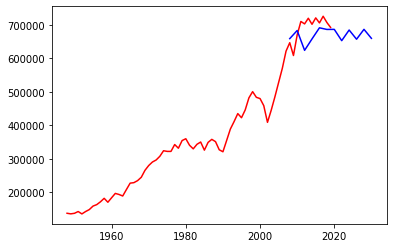

In [44]:
plt.plot(c["year"], c["gdp_serie"], color="red")
plt.plot(f["year"], f["gdp_serie"], color="blue")
plt.show()